# 1. generar el caso de prueba

In [ ]:
import random

def gen_test_case():
    randomGen = random.Random()
    # categorias
    randomEpsilon = randomGen.uniform(0.3, 0.7)
    nCats = randomGen.randint(2, 5)
    # items por categoria
    itemsCat = randomGen.randint(2, 5)
    # rangos de fairness
    lranks = []
    uranks = []
    for i in range(nCats):
        lrank = randomGen.randint(1, itemsCat-1)
        urank = randomGen.randint(lrank+1, itemsCat)
        lranks.append(lrank)
        uranks.append(urank)

    # genero items fase 1
    minValues = []
    itemsGen = []

    optimalValue = 0
    maxWeight = 0
    for i in range(nCats):
        items = []
        minValue = randomGen.randint(3, 6)
        for j in range(uranks[i]):
            peso = randomGen.randint(1, 10)
            valor = randomGen.randint(minValue, 10)
            optimalValue += valor
            maxWeight += peso
            items.append((peso, valor))
        minValues.append(minValue)
        itemsGen.append(items)

    # genero items de nuevo

    for i in range(nCats):
        for j in range(uranks[i], itemsCat):
            peso = randomGen.randint(1, 10)
            valor = randomGen.randint(0, minValues[i])
            itemsGen[i].append((peso,valor))
    returnObject = {
        "lowerRanks":lranks,
        "upperRanks":uranks,
        "nCategories":nCats,
        "optimalValue":optimalValue,
        "maxWeight":maxWeight,
        "epsilon":randomEpsilon,
        "itemMatrix":itemsGen
    }
    print(returnObject)
    return returnObject
# print(lranks,uranks,sep="canoa")
# print(itemsGen,optimalValue,maxWeight,sep="canoa")

def parse_input(obj) -> str:
    inputString = ""
    inputString += f'{obj["nCategories"]}\t{obj["maxWeight"]}\t{obj["epsilon"]}\n'
    for cat in range(obj["nCategories"]):
        inputString += f'{obj["lowerRanks"][cat]}\t{obj["upperRanks"][cat]}\n'
        inputString += f'{obj["itemMatrix"][cat][0][0]}'
        for item in range(1,len(obj["itemMatrix"][cat])):
            inputString += f'\t{obj["itemMatrix"][cat][item][0]}'  
        inputString += f'\n'
        inputString += f'{obj["itemMatrix"][cat][0][1]}'
        for item in range(1,len(obj["itemMatrix"][cat])):
            inputString += f'\t{obj["itemMatrix"][cat][item][1]}'
        inputString += f'\n'
    return inputString.rstrip("\n")

def gen_test_case_input():
    testCase = gen_test_case()
    print(testCase)
    return {"input": parse_input(testCase),"case": testCase}

# 2. ejecutar el caso de prueba y medir tiempos

In [ ]:
import time
import subprocess
# myrandomdataparsed = "3\t67\t0.5\n1\t2\n15\t10\t20\n2\t4\t6\n2\t3\n10\t20\t30\n1\t7\t2\n2\t5\n12\t15\t18\n5\t4\t3"
stdincase = gen_test_case_input()
optimalValue = stdincase["case"]["optimalValue"]
print(stdincase)
commandNuestro = ["python",r".\algoritmoNuestro.py"]
commandPaper = ["python",r".\algoritmoPaper.py"]
pNuestro = subprocess.Popen(commandNuestro, stdin=subprocess.PIPE, stdout=subprocess.PIPE, stderr=subprocess.STDOUT)
pPaper = subprocess.Popen(commandPaper, stdin=subprocess.PIPE, stdout=subprocess.PIPE, stderr=subprocess.STDOUT)

timestart = time.time()
output = pPaper.communicate(input=stdincase["input"].encode())[0]
timeend = time.time()
timestart2 = time.time()
output2 = pNuestro.communicate(input=stdincase["input"].encode())[0]
timeend2 = time.time()
totaltime = timeend-timestart
totaltime2 = timeend2-timestart2
print("algoritmo paper output")
paperoutput = int(output.decode('utf-8'))
print(paperoutput)
print("algoritmo Nuestro output")
nosotrosoutput = int(output2.decode('utf-8'))
print(nosotrosoutput)
print("algoritmo paper tiempo")
print(totaltime)
print("algoritmo Nuestro tiempo")
print(totaltime2)
print(f"valor optimo: {optimalValue}")
print("distancia al optimo paper")
print(abs(optimalValue-paperoutput))
print("distancia al optimo nuestro")
print(abs(optimalValue-nosotrosoutput))


# 2.5 Ejecutar caso de prueba v2

In [ ]:
import time
import subprocess
# myrandomdataparsed = "3\t67\t0.5\n1\t2\n15\t10\t20\n2\t4\t6\n2\t3\n10\t20\t30\n1\t7\t2\n2\t5\n12\t15\t18\n5\t4\t3"

def exec_testcase():
    stdincase = gen_test_case_input()
    optimalValue = stdincase["case"]["optimalValue"]
    # print(stdincase)
    commandNuestro = ["python",r".\algoritmoNuestro.py"]
    commandPaper = ["python",r".\algoritmoPaper.py"]
    pNuestro = subprocess.Popen(commandNuestro, stdin=subprocess.PIPE, stdout=subprocess.PIPE, stderr=subprocess.STDOUT)
    pPaper = subprocess.Popen(commandPaper, stdin=subprocess.PIPE, stdout=subprocess.PIPE, stderr=subprocess.STDOUT)

    timestart = time.time()
    output = pPaper.communicate(input=stdincase["input"].encode())[0]
    timeend = time.time()
    timestart2 = time.time()
    output2 = pNuestro.communicate(input=stdincase["input"].encode())[0]
    timeend2 = time.time()
    totaltime = timeend-timestart 
    totaltime2 = timeend2-timestart2
    paperoutput = int(output.decode('utf-8'))
    nosotrosoutput = int(output2.decode('utf-8'))
    results = {"optimalValue":optimalValue
                ,"resultPaper":paperoutput
                ,"resultNuestro":nosotrosoutput
                ,"timeTakenPaper":totaltime
                ,"timeTakenNosotros":totaltime2
                ,"timeStartPaper":timestart
                ,"timeStartNosotros":timestart
                ,"case":stdincase}
    return results


# 3. tomar tiempos acumualados

In [ ]:
import pathlib
import json
import time

jsonfile = pathlib.Path("exec_data.json")

nExcecutions = 2000

if not jsonfile.exists():
    jsonfile.touch()

def save_time():
    timestart = time.time()
    with open(jsonfile, "a") as archivo:
        archivo.write("[")
        for i in range(nExcecutions-1):
            jsnstr = json.dumps(exec_testcase())
            archivo.write(jsnstr)
            archivo.write(",")
        jsnstr = json.dumps(exec_testcase())
        archivo.write(jsnstr)
        archivo.write("]")
    timeend = time.time()
    totaltime = timeend-timestart
    print(f"Tiempo total: {totaltime}")

save_time()


# 4. Graficar

### Gráfica tiempo nosotros vs tiempo paper

archivo creado


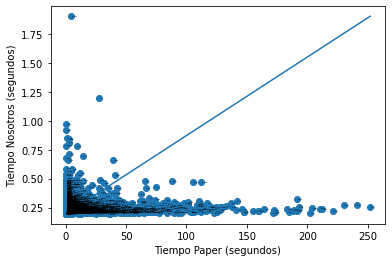

In [37]:
import matplotlib.pyplot as plt
import pathlib
import json

filepaths = pathlib.Path("testdata").glob("*.json")
cases = []

for filepath in filepaths:
    with open(filepath, "r") as archivo:
        try:
            cases.append(json.load(archivo))

        except:
            print(f"{filepath} errored")



ejextag = "Tiempo Paper (segundos)"
ejeytag = "Tiempo Nosotros (segundos)"
ejex = []
ejey = []

for case in cases:
    timepaper = None
    timenosotros = None
    try:
        timepaper = float(case["timeTakenPaper"])
    except:
        continue
    try:
        timenosotros = float(case["timeTakenNosotros"])
    except:
        continue
    ejex.append(case["timeTakenPaper"])
    ejey.append(case["timeTakenNosotros"])

with open("timestaken.csv", "w+") as archivo:
    archivo.write("case\ttimePaper\ttimeNosotros\n")
    for i, case in enumerate(cases):
        archivo.write(f"{i}\t{ejex[i]}\t{ejey[i]}\n")
    print("archivo creado")

fig, ax = plt.subplots()
for i in range(len(cases)):
    ax.annotate(f"{i}", (ejex[i], ejey[i]),xytext=(ejex[i]+0.5, ejey[i]), size=2)

# Crear la figura y los ejes
# Dibujar puntos
ax.scatter(x = ejex, y = ejey)
ax.plot([min(ejex),max(ejex)],[min(ejey),max(ejey)], markersize=1)
ax.set_xlabel(ejextag)
ax.set_ylabel(ejeytag)
# Guardar el gráfico en formato png
plt.savefig('timetaken.png', dpi=1000)
# Mostrar el gráfico
plt.show()

### Gráfica distancia al óptimo

archivo creado


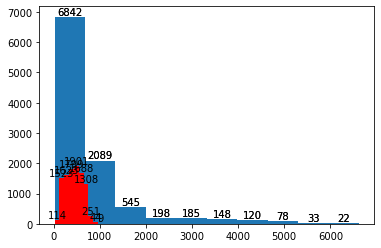

In [35]:
import matplotlib.pyplot as plt
import pathlib
import json

filepaths = pathlib.Path("testdata").glob("*.json")
cases = []


for filepath in filepaths:
    with open(filepath, "r") as archivo:
        try:
            cases.append(json.load(archivo))
        except:
            print(f"{filepath} errored")

optimos = []
resultsNosotros = []
resultsPaper = []

distanciasNosotros = []
distanciasPaper = []

for case in cases:
    optimo=None
    resultpaper=None
    resultnuestro=None
    try:
        optimo = int(case["optimalValue"])
    except:
        continue
    try:
        resultpaper = int(case["resultPaper"])
    except:
        continue
    try:
        resultnuestro = int(case["resultNuestro"])
    except:
        continue

    optimos.append(optimo)
    resultsNosotros.append(resultnuestro)
    resultsPaper.append(resultpaper)
    distanciasNosotros.append(abs(optimo-resultnuestro))
    distanciasPaper.append(abs(optimo-resultpaper))

with open("distances.csv", "w+") as archivo:
    archivo.write("case\tdistancePaper\tdistanceNosotros\toptimos\n")
    for i in range(len(distanciasPaper)):
        archivo.write(f"{i}\t{resultsPaper[i]}\t{resultsNosotros[i]}\t{optimos[i]}\n")
    print("archivo creado")

distanciamaximanosotros = max(distanciasNosotros)
distanciamaximapaper = max(distanciasPaper)

fig, ax = plt.subplots()

ax.hist(distanciasPaper)
bars = ax.patches  
for rect in bars:
    height = rect.get_height()
    ax.text(rect.get_x() + rect.get_width() / 2, height+0.01, int(height),
            ha='center', va='bottom')
ax.hist(distanciasNosotros,color="red")
bars = ax.patches  
for rect in bars:
    height = rect.get_height()
    ax.text(rect.get_x() + rect.get_width() / 2, height+0.01, int(height),
            ha='center', va='bottom')

plt.show()


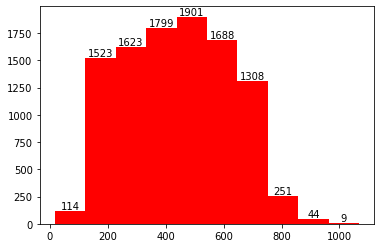

In [11]:
fig, ax = plt.subplots()

ax.hist(distanciasNosotros,color="red")

# set x range
bars = ax.patches  
for rect in bars:
    height = rect.get_height()
    ax.text(rect.get_x() + rect.get_width() / 2, height+0.01, int(height),
            ha='center', va='bottom')

plt.show()

archivo creado


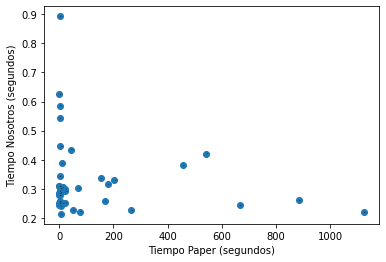

In [38]:
import matplotlib.pyplot as plt
import pathlib
import json

filepaths = pathlib.Path("testdataTrueRandom").glob("*.json")
cases = []

for filepath in filepaths:
    with open(filepath, "r") as archivo:
        try:
            cases.append(json.load(archivo))

        except:
            print(f"{filepath} errored")



ejextag = "Tiempo Paper (segundos)"
ejeytag = "Tiempo Nosotros (segundos)"
ejex = []
ejey = []

for case in cases:
    timepaper = None
    timenosotros = None
    try:
        timepaper = float(case["timeTakenPaper"])
    except:
        continue
    try:
        timenosotros = float(case["timeTakenNosotros"])
    except:
        continue
    ejex.append(case["timeTakenPaper"])
    ejey.append(case["timeTakenNosotros"])

with open("timestakenrandom.csv", "w+") as archivo:
    archivo.write("case\ttimePaper\ttimeNosotros\n")
    for i, case in enumerate(cases):
        archivo.write(f"{i}\t{ejex[i]}\t{ejey[i]}\n")
    print("archivo creado")

fig, ax = plt.subplots()
for i in range(len(cases)):
    ax.annotate(f"{i}", (ejex[i], ejey[i]),xytext=(ejex[i]+0.5, ejey[i]), size=2)

# Crear la figura y los ejes
# Dibujar puntos
ax.scatter(x = ejex, y = ejey)
# ax.plot([max(ejex),0],[max(ejey),0], markersize=1)
# ax.plot([0,0.9],[0,0.9], markersize=1)
ax.set_xlabel(ejextag)
# ax.set_ylim(0,1000)
ax.set_ylabel(ejeytag)
# Guardar el gráfico en formato png
plt.savefig('timetaken.png', dpi=1000)
# Mostrar el gráfico
plt.show()

In [40]:
import matplotlib.pyplot as plt
import pathlib
import json

filepaths = pathlib.Path("testdataTrueRandom").glob("*.json")
cases = []


for filepath in filepaths:
    with open(filepath, "r") as archivo:
        try:
            cases.append(json.load(archivo))
        except:
            print(f"{filepath} errored")

optimos = []
resultsNosotros = []
resultsPaper = []

distanciasNosotros = []
distanciasPaper = []

for case in cases:
    optimo=None
    resultpaper=None
    resultnuestro=None
    try:
        optimo = int(case["ceiling"])
    except:
        continue
    try:
        resultpaper = int(case["resultPaper"])
    except:
        continue
    try:
        resultnuestro = int(case["resultNuestro"])
    except:
        continue

    optimos.append(optimo)
    resultsNosotros.append(resultnuestro)
    resultsPaper.append(resultpaper)
    distanciasNosotros.append(abs(optimo-resultnuestro))
    distanciasPaper.append(abs(optimo-resultpaper))

with open("distancesrandom.csv", "w+") as archivo:
    archivo.write("case\tdistancePaper\tdistanceNosotros\tceiling\n")
    for i in range(len(distanciasPaper)):
        archivo.write(f"{i}\t{resultsPaper[i]}\t{resultsNosotros[i]}\t{optimos[i]}\n")
    print("archivo creado")

distanciamaximanosotros = max(distanciasNosotros)
distanciamaximapaper = max(distanciasPaper)

fig, ax = plt.subplots()

ax.hist(distanciasPaper)
bars = ax.patches  
for rect in bars:
    height = rect.get_height()
    ax.text(rect.get_x() + rect.get_width() / 2, height+0.01, int(height),
            ha='center', va='bottom')
ax.hist(distanciasNosotros,color="red")
bars = ax.patches  
for rect in bars:
    height = rect.get_height()
    ax.text(rect.get_x() + rect.get_width() / 2, height+0.01, int(height),
            ha='center', va='bottom')

plt.show()

archivo creado


ValueError: max() arg is an empty sequence